# FHIR for Research Workshop

## Exercise 2

Intro: see https://github.com/NIH-NCPI/fhir-101/blob/master/FHIR%20101%20-%20Practical%20Guide.ipynb as a great example

## What is this notebook?

(common overview of the FHIR Training)

(overview of this specific notebook)




### Icons in this Guide
 📘 A link to a useful external reference related to the section the icon appears in  

 ⚡️ A key takeaway for the section that this icon appears in  

 🖐 A hands-on section where you will code something or interact with the server  


(any required MITRE legalese should either go here or at the very bottom of the notebook)

## Motivation / Purpose

Workshop attendees will learn how to query FHIR resource and use APIs to visualize and analyze data.  

What will participants do as part of the exercise?​

 - Identify patients with desired diagnosis and data elements across multiple studies/datasets​

 - Utilize APIs to explore the data (demographics)​

 - Utilize APIs for research analyses (phenotype analysis)

## Scenario

(this section describes the specifics of the use case: what is the problem statement, what is the basic approach we are going to take, etc)


## Initial Setup

In [1]:
# import any required libraries here.
import requests
#  - fhirclient: https://github.com/smart-on-fhir/client-py
from fhirclient import client
import pandas as pd 
#  - Pandas - DataFrames
#  - NumPy - basic data analysis
#  - matplotlib
#  - maybe seaborn for viz on top of matplotlib ?
import seaborn as sns

## Step 1 Inventory Server to Identify Concepts

sync to source server for data extraction

In [2]:
BASE_URL = 'https://api.logicahealth.org/researchonfhir/open'
# BASE_URL = 'https://kf-api-fhir-service.kidsfirstdrc.org'
#BASE_URL = 'https://ncpi-api-fhir-service-dev.kidsfirstdrc.org'

# notes on the 3 servers:
# our logica sandbox has very limited diversity in data, no researchstudy/subject etc
# kf-api-fhir-service is misconfigured such that links point to localhost:8080 (we can rewrite but that's a waste of time)
# ncpi-dev has a ton of data, but almost too much diversity that it becomes a distraction

# sandbox is open, the others need cookie auth, and the cookie is easy to get wrong

In [3]:
s = requests.Session()
s.headers.update({'Accept': 'application/fhir+json'})
s.cookies['AWSELBAuthSessionCookie-0'] = "zV1oS2jCplueWBWIpAVsdU8JXhW27HoBzbRjjpc81IrlQl+YtDFkNm820s1joc2APcDe7Qfov6yrrI+jStq/ZBHLEcrSuoqktP7DZLpuvMSZj5IsigWWAkyAGVZJ1PVD7dRfq73+wLNN/4B/Ewjr49/7iP/K9ixrJUV+PWTEbhSE8vfBIzK3dNtlGsR45CK+ASQDGnCwJnDzgkMoW9zAK3ceHfnYnkaAJ2cnYBnu36yXvVvQ0fq5J7QKUjrAng12vSPQldWhusi6UrYH3JX+L4QeVi91Bre0/EkVA4ekbHka73iWlSZ0f4K86HpYZo8EWIz2n9wwijoPA4QG9m0lkuKJSlu+Ov4GWbHD5KoQP84+udhlngHsBz5ScLXIZ/qzGmHQp4qGvxuwzEX0K7NXM/qxDiqruB9+M5jr4LSHKkrViZsA0qLHF4GJopmTlOtwg4byGAIGHec1FCEK4Oy9NK0gtAIDVOTtCvyzYxxwAg/Tm2hQM1gT3pJuGZTO9FpuC3WLhu9B1+MX9q1rsLsiqOIh7i0l/ikNITfqGe8aQ8KBFgetzSaIxSpgqJwLn5zOnTfeB9bMa/fnxkwAdIshHg6oHoupa1wVybC4u/dhos4Sz/bZwYBgYswa0WiY/N6oEzymBsXVQKYCvRCVFn/Yz0Xb27T4hWEBExTzJJuB34skgA9AeRTN23aicny77wYsMNYszLUHnSlFrdn4xyyWAgiphnRnw/k4T9Rv4OiDtbAd4QpsvP1EcjhgQnPtCTiiP9Xud+/iUuRr9fwfma5wrGWbFXVJHA0XT8m1bqUsBIVXzTn9opyDv0B0DqLSaZRiEZ+opy5XutkfmCeXy4L2L+kf7mvyjD5ji4QWS0ZYqLeT47sIEWPza+TvWyZjGuV5/VLMyot2a6m9dUibZ014qe8W0kX8j52vT6qePyF7coD3YjQWARDdzQBu/B/RU5Rx9Nrhjhz/mLI4mHFzrJDCc6VmCaTnAwCA9XQzEENuHYY2L3Jdvza527vHXOhLBqbKFq13ADir4NCkKHquYPsoD9Zbfk/PER0j1ea1yuPisB86pzlOrFuMIFkKu86S1UVmsTh4P/P5ovq1OVOQj7ih704sx6zWVAr56MDNHis2Bb6pyNEDukI2Fo8imRd9+WXajLwnDOXpuANaWnJIq01iD9JSpVGMJOLWYQTKxiphmZPFy6UZgwC75KwjpdaxgiBd9Rg+XenWqo6AF5Gm6+zXJh3l6jhPwdOBJgCvCizB56CVE+DwaIwll0YtX3kXOyhy/b0sdRwSG9DOLF76lwKKuG39ihjyvtmdj6lbCArLiVahztF7nLTAcSxlienHB2IQRGdiNLRmhgLMp7aQQReXwiBsvxxpR4ybmzuO5vvKEoI28iXBHTvzvJjwueKuuKrXw/9kEb1L/mPqmbGldDergXLW867OafUBezmTsJs1kHAdDUC6Oh6pTAJZOTFrEwbMBdoir+U85CUGMDSZDUKXzHqdLgM+smeK6PjnCJ3tKBq1GYKmK9Ytdi3vV+MZMK1YMtCfjJZwrA=="

# disable SSL verification, these 2 lines should be commented out unless you see certificate errors
s.verify = False
requests.packages.urllib3.disable_warnings()

r = s.get(f"{BASE_URL}/Condition")

bundle = r.json()

bundle

{'resourceType': 'Bundle',
 'id': 'ec04d052-6ee6-40fd-956d-0df256671e80',
 'meta': {'lastUpdated': '2021-12-29T18:08:43.405+00:00'},
 'type': 'searchset',
 'link': [{'relation': 'self',
   'url': 'https://api.logicahealth.org/researchonfhir/open/Condition'},
  {'relation': 'next',
   'url': 'https://api.logicahealth.org/researchonfhir/open?_getpages=ec04d052-6ee6-40fd-956d-0df256671e80&_getpagesoffset=50&_count=50&_pretty=true&_bundletype=searchset'}],
 'entry': [{'fullUrl': 'https://api.logicahealth.org/researchonfhir/open/Condition/smart-Condition-119',
   'resource': {'resourceType': 'Condition',
    'id': 'smart-Condition-119',
    'meta': {'versionId': '1',
     'lastUpdated': '2020-07-15T02:51:25.000+00:00',
     'source': '#KQSArAdbxORTtqVw'},
    'text': {'status': 'generated',
     'div': '<div xmlns="http://www.w3.org/1999/xhtml">Single liveborn, born in hospital, delivered without mention of cesarean section</div>'},
    'clinicalStatus': {'coding': [{'system': 'http://termi

In [4]:
result_entries = bundle['entry']

def next_bundle(bundle):
    if 'link' in bundle and isinstance(bundle['link'], list):
        return next((l for l in bundle['link'] if 'relation' in l and l['relation'] == 'next'), None)
    
    return None
                    
nextbundlelink = next_bundle(bundle)
                    
while nextbundlelink is not None:
    nextbundleurl = nextbundlelink['url']
    r = s.get(nextbundleurl)

    nextbundle = r.json()

    result_entries.extend(nextbundle['entry'])
                    
    nextbundlelink = next_bundle(nextbundle)


f"Found {len(result_entries)} total Condition entries"

'Found 608 total Condition entries'

In [5]:
conditions = list(map(lambda e: e['resource'], result_entries))

def get_code(c):
    if 'code' in c:
        if 'coding' in c['code']:
            return c['code']['coding'][0]
    
    if 'text' in c:
        return {'display': c['text']}

    return {}

codes = list(map(lambda c: get_code(c), conditions))

codes_df = pd.DataFrame(codes, columns=['system', 'code', 'display'])

codes_df

,system,code,display
0,http://snomed.info/sct,442311008,"Single liveborn, born in hospital, delivered w..."
1,http://snomed.info/sct,267024001,Abnormal weight loss
2,http://snomed.info/sct,310249008,Follow-up encounter
3,http://snomed.info/sct,235595009,Gastroesophageal reflux disease
4,http://snomed.info/sct,185903001,Needs influenza immunization
...,...,...,...
603,http://snomed.info/sct,389087006,Hypoxemia (disorder)
604,http://snomed.info/sct,271825005,Respiratory distress (finding)
605,http://snomed.info/sct,160903007,Full-time employment (finding)
606,http://snomed.info/sct,73595000,Stress (finding)


In [6]:
result_entries

[{'fullUrl': 'https://api.logicahealth.org/researchonfhir/open/Condition/smart-Condition-119',
  'resource': {'resourceType': 'Condition',
   'id': 'smart-Condition-119',
   'meta': {'versionId': '1',
    'lastUpdated': '2020-07-15T02:51:25.000+00:00',
    'source': '#KQSArAdbxORTtqVw'},
   'text': {'status': 'generated',
    'div': '<div xmlns="http://www.w3.org/1999/xhtml">Single liveborn, born in hospital, delivered without mention of cesarean section</div>'},
   'clinicalStatus': {'coding': [{'system': 'http://terminology.hl7.org/CodeSystem/condition-clinical',
      'code': 'active',
      'display': 'Active'}],
    'text': 'Active'},
   'verificationStatus': {'coding': [{'system': 'http://terminology.hl7.org/CodeSystem/condition-ver-status',
      'code': 'confirmed',
      'display': 'Confirmed'}],
    'text': 'Confirmed'},
   'code': {'coding': [{'system': 'http://snomed.info/sct',
      'code': '442311008',
      'display': 'Single liveborn, born in hospital, delivered without

<AxesSubplot:xlabel='count', ylabel='display'>

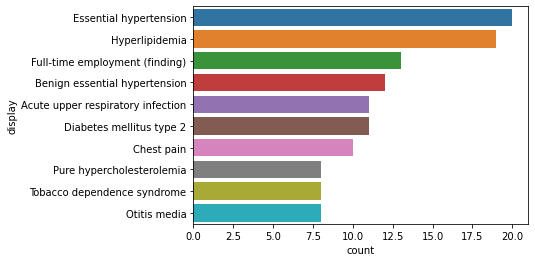

In [7]:
codes_df = codes_df.sort_values('code')

# i don't understand why but this groupby doesn't work on the KF data, maybe there are too many null fields 
# (KF doesn't seem to include display most of the time)
counts = codes_df.groupby(['code', 'display']).count().reset_index()

counts.rename(columns={'system': 'count'}, inplace=True)

counts = counts.sort_values('count', ascending=False).head(10)

codes_df
sns.barplot(data=counts, x='count', y='display')


## Step 2 Query Data for Selected Concepts

Submit query to source and retreive data. Save it locally

![KF Dashboard](img/kf_dashboard.png)

In [8]:
# Available Data

# this appears to be DocumentReference.type

In [9]:
# Studies

# studies = https://kf-api-fhir-service.kidsfirstdrc.org/ResearchStudy
# not sure how to translate ResearchStudy.title into the short names seen here
# ex "Kids First: Genomic Analysis of Congenital Heart Defects and Acute Lymphoblastic Leukemia in Children with Down Syndrome"
# --> "KF-CHDALL" ?
# then the counts are ResearchSubject counts grouped by .study


In [10]:
# Observed Phenotypes

# this is a hierarchy of diagnoses. we could probably do something similar but this may require a MONDO API
# for synthea data we could loop in a SNOMED API

In [11]:
# Most Frequent Diagnoses

# see above

In [16]:
# Demographics

# gender -> Patient.gender
# race -> Patient.extension.us-core-race
# ethnicity -> Patient.extension.us-core-ethnicity

# note most of the logica default patients do not have race/ethnicity

# what the heck is family composition?


r = s.get(f"{BASE_URL}/Patient")

bundle = r.json()

result_entries = bundle['entry']

nextbundlelink = next_bundle(bundle)
                    
while nextbundlelink is not None:
    nextbundleurl = nextbundlelink['url']
    r = s.get(nextbundleurl)

    nextbundle = r.json()

    result_entries.extend(nextbundle['entry'])
                    
    nextbundlelink = next_bundle(nextbundle)


print(f"Found {len(result_entries)} total Patient entries")


patients = list(map(lambda e: e['resource'], result_entries))


genders = list(map(lambda p: p['gender'], patients))

def get_us_core_extension_value(key, extensions):
    url = f"http://hl7.org/fhir/us/core/StructureDefinition/us-core-{key}"
    
    extension = next(filter(lambda e: e['url'] == url, extensions), None)
    
    if extension is None:
        return None
    
    extension = extension['extension'][0]
    
    if 'valueString' in extension:
        return extension['valueString']
    elif 'valueCoding' in extension:
        return extension['valueCoding']['display']
    
    return None

#
def get_race(patient):
    if 'extension' not in patient:
        return None
    return get_us_core_extension_value('race', patient['extension'])
    
def get_ethnicity(patient):
    if 'extension' not in patient:
        return None
    return get_us_core_extension_value('ethnicity', patient['extension'])

races = list(map(lambda p: get_race(p), patients))
ethnicities = list(map(lambda p: get_ethnicity(p), patients))

genders

Found 70 total Patient entries


['male',
 'female',
 'male',
 'male',
 'male',
 'male',
 'female',
 'male',
 'male',
 'male',
 'male',
 'female',
 'female',
 'female',
 'female',
 'female',
 'male',
 'female',
 'female',
 'male',
 'female',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'female',
 'female',
 'female',
 'male',
 'female',
 'female',
 'male',
 'female',
 'male',
 'female',
 'male',
 'male',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'male',
 'female',
 'female',
 'male',
 'male',
 'female',
 'male',
 'female',
 'female',
 'female',
 'male',
 'female',
 'female',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'female']

<AxesSubplot:ylabel='None'>

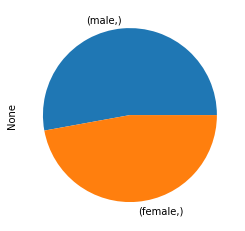

In [38]:
pd.DataFrame(genders).value_counts().plot.pie()

<AxesSubplot:ylabel='None'>

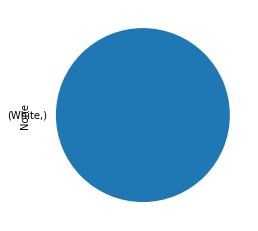

In [39]:
pd.DataFrame(races).value_counts().plot.pie()

<AxesSubplot:ylabel='None'>

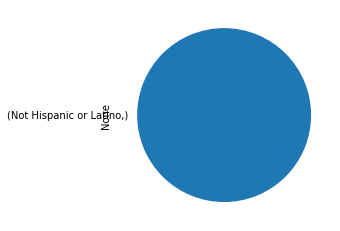

In [40]:
pd.DataFrame(ethnicities).value_counts().plot.pie()

In [ ]:
# Age at Diagnosis

# condition recordedDate

# query condition & patient, join on patient ID

In [ ]:
# Overall Survival

# query condition, patient, observation

# https://kf-api-fhir-service.kidsfirstdrc.org/Observation?code=263493007
# code = "clinical status", value = "Alive" or "Dead" (display)/"Deceased" (text)
# note these are relative to dob

# condition recordedDate is also relative to dob


## Step 3 Mount Data onto Pandas Dataframe

Take FHIR formatted data and convert it to a pandas dataframe for subsequent analysis.

This resource seems like a good one! https://github.com/dermatologist/fhiry

## Step 4 Exploratory Data Analysis 

Conduct some limited, EDA for demonstration purposes.

## Summary

(A review of what was done in this notebook, possibly reinforcing how this kind of use case could be useful in the real world)